In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## Linear Regression with McDonald's Menu Data


In [2]:
df = pd.read_csv("menu.csv")

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
df.describe

<bound method NDFrame.describe of                Category                                               Item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        Serving Size  Calorie

In [5]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [6]:
df.isnull().any()

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool

## Calories Prediction Equation [Part (a)]

The equation to predict the Calories is as follows:

**Calories = θ₀ + θ₁ × [Carbohydrates] + θ₂ × [Protein] + θ₃ × [Total Fat]**

### Explanation:

- **θ₀**: Intercept term (base level of calories)
- **θ₁**: Coefficient for Carbohydrates
- **θ₂**: Coefficient for Protein
- **θ₃**: Coefficient for Total Fat


In [7]:
X = df[["Carbohydrates", "Protein", "Total Fat"]]
y = df["Calories"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

val_0 = model.intercept_
val_1, val_2, val_3 = model.coef_

print(
    f"This is in there just as a reference of what the calories would be if carbs, proteins, and total fats all were 0: {val_0}"
)
print(
    f"This shows how much the calories will increase for each additional gram of carbs with the fats and proteins as a constant value: {val_1}"
)
print(
    f"This shows how much the calories will increase with each additional gram of protein: {val_2}"
)
print(f"Shows the effect of the fat on calories (same as the other 2): {val_3}")

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

This is in there just as a reference of what the calories would be if carbs, proteins, and total fats all were 0: -2.1160894045955274
This shows how much the calories will increase for each additional gram of carbs with the fats and proteins as a constant value: 3.9888708598616964
This shows how much the calories will increase with each additional gram of protein: 4.054709036883208
Shows the effect of the fat on calories (same as the other 2): 9.00299792825883
Mean Squared Error: 27.166420663786862


## Train a Predictor to Predict Calories

Train a predictor to predict the Calories as follows:

**Calories = θ₀ + θ₁ × [Total Fat]**

### Task:

- Report the values of **θ₀** and **θ₁**.
- Note that the coefficient **θ₁** here might be different than the one from part (a) even though they refer to the same feature.
- Provide an explanation as to why these coefficients might vary significantly.


In [8]:
X = df[["Total Fat"]]
y = df["Calories"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

val_0 = model.intercept_
val_1 = model.coef_[0]

print(f"Base case for Calories IF total fat is 0: {val_0}")
print(
    f"This shows how much calories increase for each additional gram of total fat: {val_1}"
)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Base case for Calories IF total fat is 0: 154.33815642780257
This shows how much calories increase for each additional gram of total fat: 15.24513685991081
Mean Squared Error: 7482.588998020761


## Data Splitting and Model Evaluation

### How I am going to do the task:

1. Split the data into two:
   - The first 80% for training.
   - The remaining 20% for testing.
2. Train the model using all the features available in the training set only.
3. Report the Mean Squared Error (MSE) on both the training and test sets.
4. This was not needed but I was getting pretty into the dataset so I thought it would be fun to make a graph of the predicted vs the actual.

### Analysis:

- **Overfitting**: If the model's performance on the training set is much better than on the test set, it probably means overfitting. This usually happens because the model learns the noise and details of the training data that do not generalize well to new data.
- **Underfitting**: This is pretty much the same as overfitting bu if the model performs poorly on both sets, it might not have got the underlying trends effectively.

### Visualization:

- A linear regression graph comparing actual vs. predicted `Calories` for both the training and test sets looks cool to visually assess model performance.


Train MSE: 29.713843529132312
Test MSE: 38.769970301334894


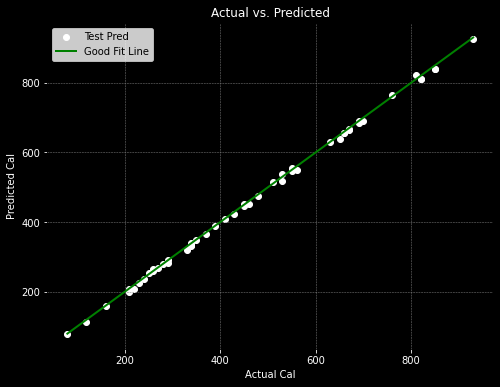

In [9]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

X_train = train_data[["Carbohydrates", "Protein", "Total Fat"]]
y_train = train_data["Calories"]
X_test = test_data[["Carbohydrates", "Protein", "Total Fat"]]
y_test = test_data["Calories"]

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred, color="white", label="Test Pred")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="green",
    lw=2,
    label="Good Fit Line",
)
plt.xlabel("Actual Cal", color="white")
plt.ylabel("Predicted Cal", color="white")
plt.title("Actual vs. Predicted", color="white")
plt.legend()
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.tick_params(axis="x", colors="white")
plt.tick_params(axis="y", colors="white")

plt.show()

## Part 2: Adult Income Dataset


In [10]:
adult_df = pd.read_csv("adult.csv")

In [11]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
adult_df.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

## Preprocessing Data

### Task:

1. Handle Missing Values (_I tried a couple of methods and found no N/A values_)
2. Convert Categorical Variables into Dummy/Indicator Variables


In [14]:
adult_df.isnull().sum()

empty_strings = (adult_df == "").sum()
print(empty_strings)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [15]:
cat_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "native-country",
    "income",
]

adult_df_encoded = pd.get_dummies(adult_df, columns=cat_columns, drop_first=True)

print(adult_df_encoded.head())
print(adult_df_encoded.columns)

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                 True                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Puerto-Rico  \
0               True  ...    

## Training a Logistic Regression Model

### Task:

1. Split the Dataset
2. Train the Logistic Regression Model
3. Evaluate the Model on the Testing Set:
   - **Metrics**
   - **Accuracy**
   - **Precision**
   - **Recall**
   - **F1-score**
   - **ROC-AUC**


Accuracy: 0.8036646534957519
Precision: 0.7147806004618937
Recall: 0.2703056768558952
F1 Score: 0.39226869455006336
ROC-AUC: 0.5782058176285156


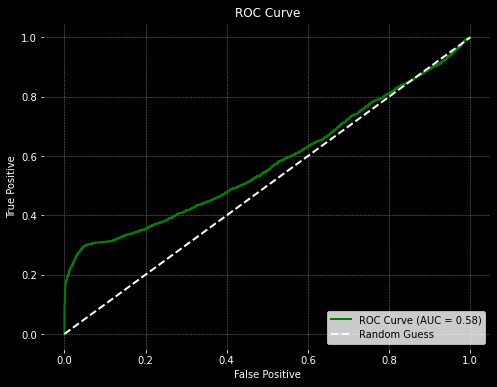

In [16]:
y = adult_df["income"].apply(lambda x: 1 if x == ">50K" else 0)

adult_df_encoded = pd.get_dummies(adult_df.drop("income", axis=1), drop_first=True)
X = adult_df_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="white", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive", color="white")
plt.ylabel("True Positive", color="white")
plt.title("ROC Curve", color="white")
plt.legend(loc="lower right")
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.tick_params(axis="x", colors="white")
plt.tick_params(axis="y", colors="white")

plt.show()

## Training a Logistic Regression Model with 10-Fold Cross-Validation

### Task:

1. **Train the Logistic Regression Model using 10-Fold Cross-Validation**:
2. **Evaluate the Model**:

   - **Metrics**:
     - _Accuracy_
     - _Precision_
     - _Recall_
     - _F1-score_
     - _ROC-AUC_

3. **Generate a Confusion Matrix and Heatmap**:


Accuracy: 0.8007657344089104
Precision: 0.7054621848739496
Recall: 0.2873278001197912
F1 Score: 0.4083419468596096
ROC-AUC: 0.6171024956941934


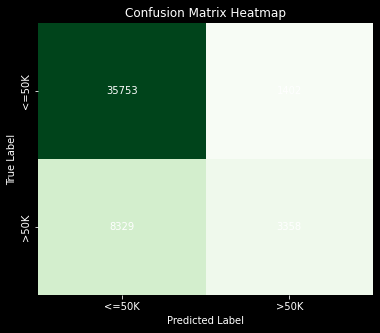

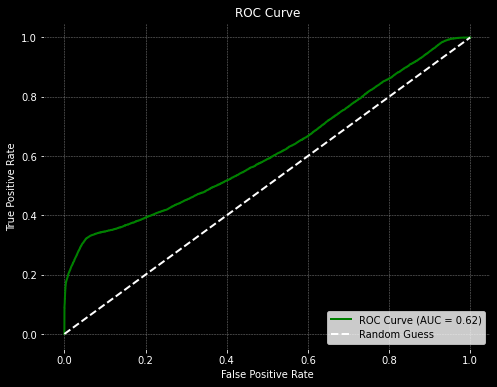

In [17]:
y = adult_df["income"].apply(lambda x: 1 if x == ">50K" else 0)
X = pd.get_dummies(adult_df.drop("income", axis=1), drop_first=True)

model = LogisticRegression(max_iter=1000)

y_pred = cross_val_predict(model, X, y, cv=10, method="predict")
y_pred_proba = cross_val_predict(model, X, y, cv=10, method="predict_proba")[:, 1]

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Greens",
    cbar=False,
    xticklabels=["<=50K", ">50K"],
    yticklabels=["<=50K", ">50K"],
    annot_kws={"color": "white"},
)
plt.xlabel("Predicted Label", color="white")
plt.ylabel("True Label", color="white")
plt.title("Confusion Matrix Heatmap", color="white")

plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.tick_params(axis="x", colors="white")
plt.tick_params(axis="y", colors="white")

plt.show()

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="green", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="white", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate", color="white")
plt.ylabel("True Positive Rate", color="white")
plt.title("ROC Curve", color="white")
plt.legend(loc="lower right")
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)

plt.gca().set_facecolor("black")
plt.gcf().patch.set_facecolor("black")
plt.tick_params(axis="x", colors="white")
plt.tick_params(axis="y", colors="white")

plt.show()